# Writing evaluation code
#### Evaluation of essays written by students in grades 6 to 12 (11 to 18 years old)

In [61]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [62]:
# Import dataset from Github
train_data = pd.read_csv("https://raw.githubusercontent.com/irhuru/writing-evaluation/main/train.csv")
train_data.head()

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...


## Exploratory Data Analysis (EDA)

#### Missing values

In [63]:
# Check for missing values
train_data.isnull().sum()

id                    0
discourse_id          0
discourse_start       0
discourse_end         0
discourse_text        0
discourse_type        0
discourse_type_num    0
predictionstring      0
dtype: int64

#### Duplicate values

In [64]:
# Check for duplicates
train_data.isnull().sum()

id                    0
discourse_id          0
discourse_start       0
discourse_end         0
discourse_text        0
discourse_type        0
discourse_type_num    0
predictionstring      0
dtype: int64

#### How many words (on average) does each segment contain?

In [65]:
# Step 1: Adding a new column with number of words per discourse_text
str_len = []
for row in train_data['predictionstring']:
    l = len(row.split())
    str_len.append(l)
train_data['str_len'] = str_len

# Step 2: Calculate average, max, and min
train_data['str_len'].mean() # 43.42 words
train_data['str_len'].max() # 836 words
train_data['str_len'].min() # 1 word

1

#### Overall number of discourse elements

In [66]:
df_elements = train_data.groupby(['discourse_type']).size().reset_index()
df_elements

,discourse_type,0
0,Claim,50208
1,Concluding Statement,13505
2,Counterclaim,5817
3,Evidence,45702
4,Lead,9305
5,Position,15419
6,Rebuttal,4337


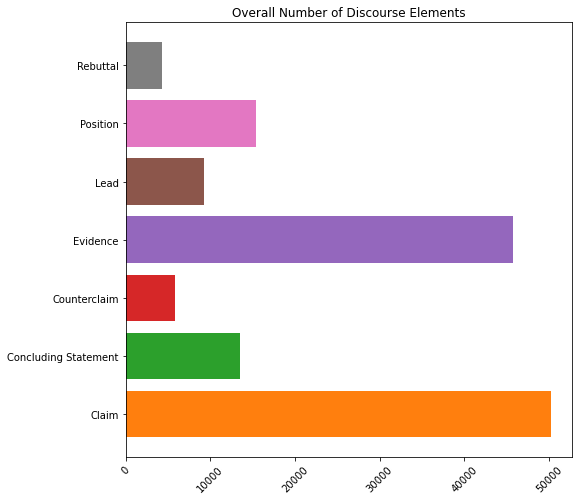

In [67]:
# Visualization
fig, ax = plt.subplots(1)
fig.set_size_inches(8,8)
ax.barh(df_elements['discourse_type'], df_elements[0], color = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7'])
ax.set_title('Overall Number of Discourse Elements')
ax.tick_params(axis='x', labelrotation = 45)

#### Distribution of discourse elements per essay

In [68]:
# Step 1: Grouping by id and discourse type
df_ind_distribution = train_data.groupby(['id','discourse_type']).size().reset_index()

# Step 2: Creating a pivot table based on column values
df_ind_distribution = df_ind_distribution.pivot(index = 'id', columns='discourse_type', values = 0)

# Step 3: Calculating descriptive stats for each discourse type
distribution_summary = df_ind_distribution.describe()
distribution_summary['stats'] = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
distribution_summary = (distribution_summary.melt(id_vars=["stats"],
                           value_vars =["Claim",'Concluding Statement','Counterclaim',
                                       'Evidence', 'Lead', 'Position', 'Rebuttal'],value_name="values")
 .replace('', np.nan,)
 .dropna()
 .sort_values('stats'))
distribution_summary = distribution_summary[distribution_summary['stats'] == 'mean']
distribution_summary

,stats,discourse_type,values
25,mean,Evidence,2.939035
33,mean,Lead,1.000430
1,mean,Claim,3.363569
49,mean,Rebuttal,1.205392
17,mean,Counterclaim,1.271198
41,mean,Position,1.003449
9,mean,Concluding Statement,1.006484


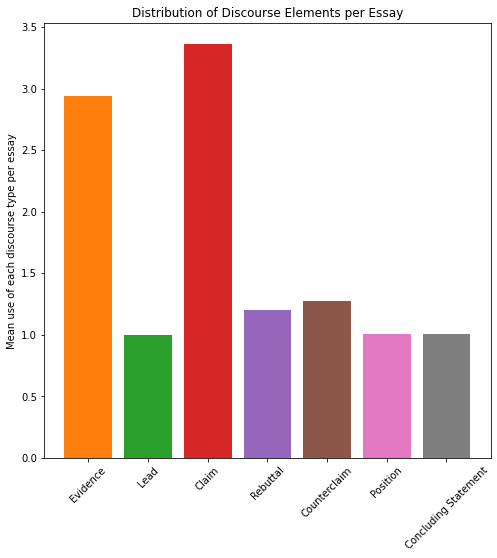

In [69]:
# Visualization
fig, ax = plt.subplots(1)
fig.set_size_inches(8,8)
ax.bar(distribution_summary['discourse_type'], distribution_summary['values'], color = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7'])
ax.set_title('Distribution of Discourse Elements per Essay')
ax.set_ylabel('Mean use of each discourse type per essay')
ax.tick_params(axis='x', labelrotation = 45)

In [ ]:
## TO DO (DUE FRIDAY MAY 20)
# Look for missing values and duplicates
# Basic data manipulation and preliminary feature engineering
# Other data cleaning and pre-processing

## TO DO (DUE NEXT WEEK)
# EDA + visualizations: distribution of variables, outliers, descriptive stats
# Written proposal of modeling approach
# Dimensionality reduction (if needed)